**Historical datas of earthquakes in Kazakhstan and neighboring countries (1991-2024)**

Earthquakes are natural phenomena that have significant impacts on communities and infrastructure worldwide. Understanding the frequency, magnitude, and distribution of earthquakes is crucial for disaster preparedness and risk mitigation efforts. In this analysis, we utilize TensorFlow, a powerful open-source machine learning framework, to explore and visualize historical earthquake data in independent Kazakhstan and neighboring countries from 1991 to 2024.

In [1]:
!pip install basemap
!pip install numpy
!pip install cartopy

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 47.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 38.7 MB/s eta 0:00:00


Table of first 5 earthquakes

In [2]:
import pandas as pd

# Define the URL
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=1991-12-16%2000:00:00&endtime=2024-02-23%2023:59:59&maxlatitude=55.974&minlatitude=40.179&maxlongitude=89.648&minlongitude=43.594&minmagnitude=2.5&orderby=time-asc'

# Load the earthquake data from the URL into a DataFrame, selecting only required columns
earthquake_data = pd.read_csv(url, usecols=['time', 'latitude', 'longitude', 'depth', 'mag'])

# Display the DataFrame
print(earthquake_data.head())

                       time  latitude  longitude  depth  mag
0  1991-12-17T23:49:54.590Z    44.333     83.727   17.1  4.9
1  1991-12-18T13:44:04.110Z    41.390     87.809   33.0  4.4
2  1992-01-02T05:37:34.000Z    40.640     71.167   33.0  4.8
3  1992-01-02T05:50:07.690Z    41.417     72.103   33.0  4.5
4  1992-01-05T17:14:21.040Z    40.873     71.172   16.1  5.0


a) Visualizing earthquake events on a map using Matplotlib and Basemap provides a powerful tool for analyzing and communicating seismic data. By combining geospatial visualization techniques with earthquake data analysis, we enhance our understanding of seismic hazards and contribute to efforts aimed at reducing the vulnerability of communities to earthquake-related disasters.

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


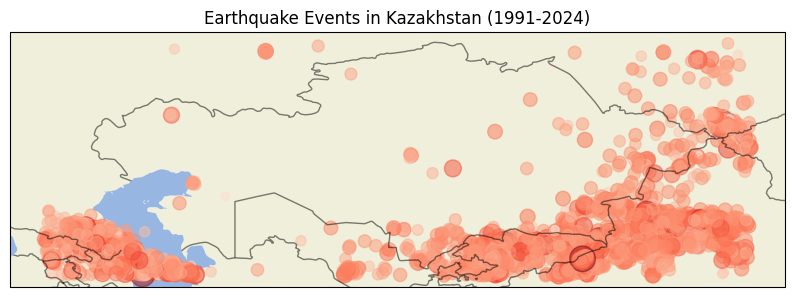

In [3]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add land, ocean, and borders
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)

# Plot earthquake events
ax.scatter(earthquake_data['longitude'].values, earthquake_data['latitude'].values,
          c=earthquake_data['mag'], s=earthquake_data['mag'] ** 3, cmap='Reds', alpha=0.5,
          transform=ccrs.PlateCarree())

# Add colorbar and title

plt.title('Earthquake Events in Kazakhstan (1991-2024)')

# Show plot
plt.show()

b) Plotting a histogram of earthquake magnitudes provides a valuable tool for analyzing the distribution of seismic activity in Kazakhstan. By visualizing the frequency of earthquakes across different magnitude ranges, we enhance our understanding of the seismic hazard landscape and contribute to efforts aimed at reducing the vulnerability of communities to earthquake-related disasters.

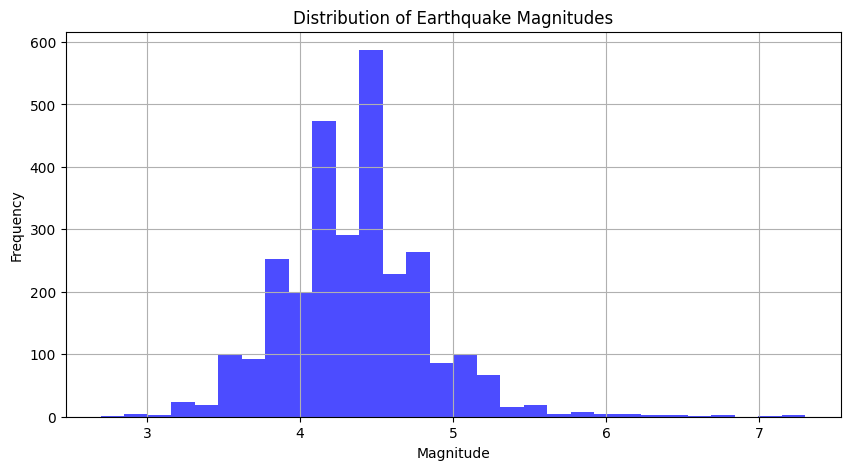

In [4]:
# Distribution of Magnitudes
plt.figure(figsize=(10, 5))
plt.hist(earthquake_data['mag'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitudes')
plt.grid(True)
plt.show()


c) The distribution of earthquake depths provides valuable insights into the geophysical processes occurring beneath the Earth's surface. Earthquakes, which are caused by the sudden release of energy along fault lines, can originate at various depths within the Earth's crust and mantle. Understanding the distribution of earthquake depths is essential for seismologists and geologists to infer the tectonic activity and structural characteristics of the Earth's interior.

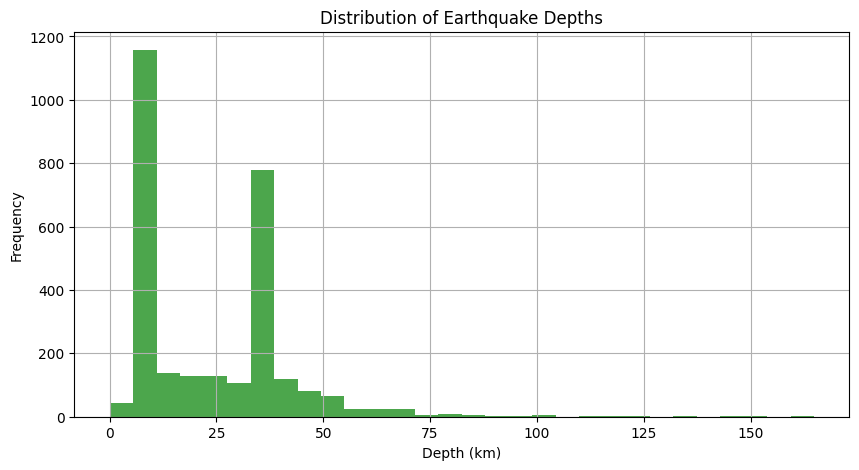

In [5]:
# Distribution of Depths
plt.figure(figsize=(10, 5))
plt.hist(earthquake_data['depth'], bins=30, color='green', alpha=0.7)
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Depths')
plt.grid(True)
plt.show()



d) Plotting a time series of earthquake occurrences provides valuable insights into the temporal dynamics of seismic activity in Kazakhstan. By visualizing how the frequency of earthquakes varies over time, we enhance our understanding of seismic hazard patterns and contribute to efforts aimed at mitigating the impact of earthquakes on communities and infrastructure.

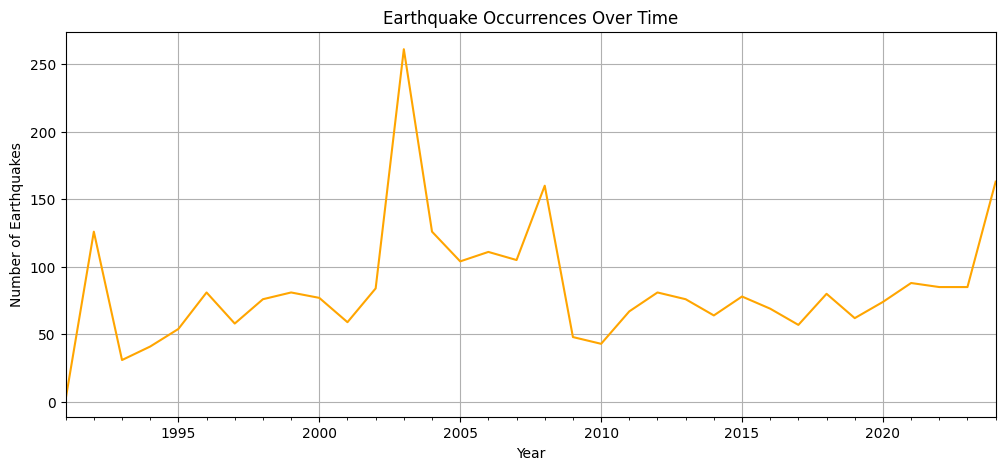

In [6]:
# Occurrences over Time
plt.figure(figsize=(12, 5))
earthquake_data['time'] = pd.to_datetime(earthquake_data['time'])
earthquake_data.set_index('time', inplace=True)
earthquake_data.resample('Y').size().plot(color='orange')
plt.title('Earthquake Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

**Using machine learning**

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00        28

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



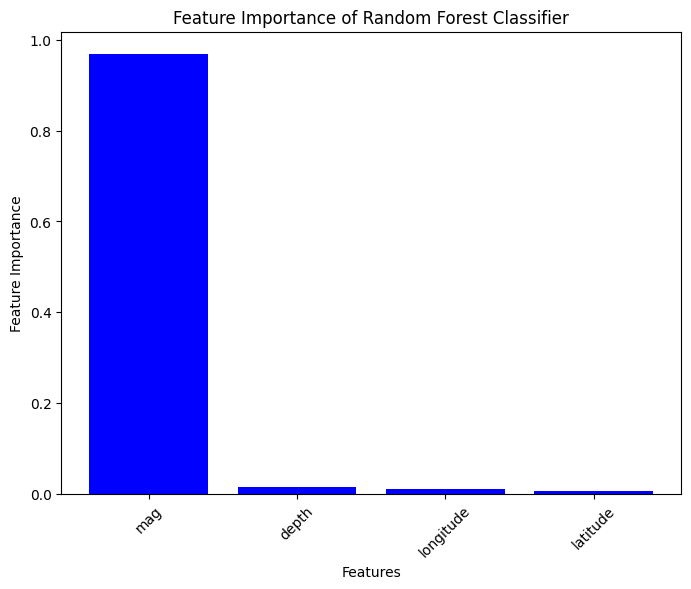

In [7]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable for earthquake occurrence (1 if earthquake magnitude > 5, else 0)
earthquake_data['target'] = np.where(earthquake_data['mag'] > 5, 1, 0)

# Split data into features and target variable
X = earthquake_data[['latitude', 'longitude', 'depth', 'mag']]
y = earthquake_data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importances
plt.figure(figsize=(8, 6))
feature_importances = clf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X.shape[1]), feature_importances[indices], color='blue', align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()